<a id='Top'></a>

# Yelp Recommender System Project
## Part 1 Data Wrangling

### Overview

1. <a href='#business'>Business data</a>
1. <a href='#Review'>Review data</a> 
1. <a href='#User'>User data</a>
1. <a href='#Summary'>Summary</a>

#### Converting json files to csv files

I updated json_to_csv_converter.py from https://github.com/Yelp/dataset-examples/blob/master/json_to_csv_converter.py
to make it work for Python 3 using the following steps:
1. iteritems() --> items()
2. Add this argument encoding="utf8" whenever opening json files
https://stackoverflow.com/questions/9233027/unicodedecodeerror-charmap-codec-cant-decode-byte-x-in-position-y-character
3. 'wb+' -->'w+'
https://stackoverflow.com/questions/34283178/typeerror-a-bytes-like-object-is-required-not-str-in-python-and-csv
4. 'unicode' --> 'str'
https://stackoverflow.com/questions/19877306/nameerror-global-name-unicode-is-not-defined-in-python-3

Then I ran this command "python json_to_csv_converter_updated.py yelp_academic_dataset_review.json" in cmd for review, user, and business files. The file 'yelp_academic_dataset_business.json' threw an error, but converting it to a csv file was unnecessary since pd.read_json() worked.

I found using pd.read_json() is more simple to read json files than the above method, but the csv file for reviews converted by the above method was useful for loading selected columns (to avoid memory error).

In [181]:
import pandas as pd

<a id='business'></a>

### 1. Business Data

In [182]:
# load json as string
#import json
#json.load((open('yelp_academic_dataset_business.json',encoding="utf8")))

The above threw an error, so I tried the below code and it worked

In [183]:
import simplejson as json

with open('yelp_academic_dataset_business.json',encoding="utf8") as fin:
    for line in fin:
        print(json.loads(line))
        break # to check only one line

{'business_id': 'Apn5Q_b6Nz61Tq4XzPdf9A', 'name': 'Minhas Micro Brewery', 'neighborhood': '', 'address': '1314 44 Avenue NE', 'city': 'Calgary', 'state': 'AB', 'postal_code': 'T2E 6L6', 'latitude': 51.0918130155, 'longitude': -114.031674872, 'stars': 4.0, 'review_count': 24, 'is_open': 1, 'attributes': {'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}, 'categories': 'Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel', 'hours': {'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}}


This is hard to read. I will make it look better.

In [184]:
with open('yelp_academic_dataset_business.json',encoding="utf8") as fin:
    for line in fin:
        business_columns = list(json.loads(line).keys())
        
        for key, value in json.loads(line).items():
            print(key,":  ", value)
        break # to check only one line

business_id :   Apn5Q_b6Nz61Tq4XzPdf9A
name :   Minhas Micro Brewery
neighborhood :   
address :   1314 44 Avenue NE
city :   Calgary
state :   AB
postal_code :   T2E 6L6
latitude :   51.0918130155
longitude :   -114.031674872
stars :   4.0
review_count :   24
is_open :   1
attributes :   {'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}
categories :   Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel
hours :   {'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}


In [185]:
business_columns

['business_id',
 'name',
 'neighborhood',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'attributes',
 'categories',
 'hours']

In [186]:
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

Without lines=True, this threw error  "trailing data", but I found a helful answer here https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pythons-pandas

In [187]:
business_df=business_df[business_columns]

In [188]:
business_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,MontrÃ©al,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,None,"Insurance, Financial Services",None
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [189]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
business_id     188593 non-null object
name            188593 non-null object
neighborhood    188593 non-null object
address         188593 non-null object
city            188593 non-null object
state           188593 non-null object
postal_code     188593 non-null object
latitude        188587 non-null float64
longitude       188587 non-null float64
stars           188593 non-null float64
review_count    188593 non-null int64
is_open         188593 non-null int64
attributes      162807 non-null object
categories      188052 non-null object
hours           143791 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [190]:
# Count missing values
business_df.isna().sum()

business_id         0
name                0
neighborhood        0
address             0
city                0
state               0
postal_code         0
latitude            6
longitude           6
stars               0
review_count        0
is_open             0
attributes      25786
categories        541
hours           44802
dtype: int64

Note that there can be also missing values even if the above list shows zero for missing values (e.g. blank string). I will take care of missing values later. For now, I need to extract restaurants and places to eat which are businesses in my interest.

In [191]:
business_df['categories'][0:5]

0    Tours, Breweries, Pizza, Restaurants, Food, Ho...
1    Chicken Wings, Burgers, Caterers, Street Vendo...
2    Breakfast & Brunch, Restaurants, French, Sandw...
3                        Insurance, Financial Services
4    Home & Garden, Nurseries & Gardening, Shopping...
Name: categories, dtype: object

In [192]:
business_df['categories'][0]

'Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel'

This is one string, so I need to split it into a list of strings to find a list of all categories appearing in the column.

In [193]:
business_df.categories[0].split(",")

['Tours', ' Breweries', ' Pizza', ' Restaurants', ' Food', ' Hotels & Travel']

Some have white space in the beginning.

In [194]:
[y.strip() for y in business_df.categories[0].split(",")]

['Tours', 'Breweries', 'Pizza', 'Restaurants', 'Food', 'Hotels & Travel']

In [195]:
business_df['categories'] = business_df['categories'].apply(lambda x: [y.strip() for y in x.split(",")] if x else None)

In [196]:
business_df['categories'][0]

['Tours', 'Breweries', 'Pizza', 'Restaurants', 'Food', 'Hotels & Travel']

In [197]:
# Make a set of business categories
business_categories =set()

for categories in business_df['categories']:
    if categories:
        business_categories.update(set(categories))

In [198]:
len(business_categories)

1305

In [199]:
business_categories = [x for x in sorted(list(business_categories))]

In [462]:
business_categories[:20]

['& Probates',
 '3D Printing',
 'ATV Rentals/Tours',
 'Acai Bowls',
 'Accessories',
 'Accountants',
 'Acne Treatment',
 'Active Life',
 'Acupuncture',
 'Addiction Medicine',
 'Adoption Services',
 'Adult',
 'Adult Education',
 'Adult Entertainment',
 'Advertising',
 'Aerial Fitness',
 'Aerial Tours',
 'Aestheticians',
 'Afghan',
 'African']

- I found there are 1305 categories in total, so it is hard to find restaurant related categories manually. 
- Fortunately, I found the category list from https://www.yelp.com/developers/documentation/v3/all_category_list. Categories are hierarchical with many subcategories over 3 layers deep. 
- By inspecting the webpage, I found there are only two top categories related to eating places, Food and Restaurants. I will use only businesses in the two categories. 
- Note that the Food category includes some subcategories that might not be the places to eat such as Grocery and Convenience Stores.
- The category information is also available as a json file in the website, but I found it useless for my analysis (see below for my exploration).

In [201]:
# load json as string
import json
json.load((open('categories.json',encoding="utf8")))[:5] # check the first 5

[{'alias': '3dprinting', 'parents': ['localservices'], 'title': '3D Printing'},
 {'alias': 'abruzzese',
  'country_whitelist': ['IT'],
  'parents': ['italian'],
  'title': 'Abruzzese'},
 {'alias': 'absinthebars',
  'country_whitelist': ['CZ'],
  'parents': ['bars'],
  'title': 'Absinthe Bars'},
 {'alias': 'acaibowls',
  'country_blacklist': ['CL', 'PL', 'IT', 'AR', 'MX', 'TR'],
  'parents': ['food'],
  'title': 'Acai Bowls'},
 {'alias': 'accessories', 'parents': ['fashion'], 'title': 'Accessories'}]

In [202]:
categories_df = pd.read_json('categories.json')

In [203]:
categories_df.head()

,alias,country_blacklist,country_whitelist,parents,title
0,3dprinting,NaN,NaN,[localservices],3D Printing
1,abruzzese,NaN,[IT],[italian],Abruzzese
2,absinthebars,NaN,[CZ],[bars],Absinthe Bars
3,acaibowls,"[CL, PL, IT, AR, MX, TR]",NaN,[food],Acai Bowls
4,accessories,NaN,NaN,[fashion],Accessories


In [204]:
categories_df.parents.apply(lambda x: x[0] if x else None).nunique()
#categories_df.parents.apply(lambda x: x[0] if x else None).unique()

118

In [205]:
categories_df[categories_df.alias =='food']

,alias,country_blacklist,country_whitelist,parents,title
523,food,NaN,NaN,[],Food


In [206]:
categories_df[categories_df.alias =='restaurants']

,alias,country_blacklist,country_whitelist,parents,title
1164,restaurants,NaN,NaN,[],Restaurants


The dataframe shows all categories and their parents (right above category) if any. This might be useful information later, but not now.

#### Select Food and Restaurant businesses

I will first make two new columns called 'restaurant' and 'food' with values 1 and 0 indicating True and False. Then I will make a column called 'food_and_restaurant' that has 1 for businesses in Food and Restaurants categories and 0 for other businesses.

In [207]:
business_df["restaurant"] = business_df.categories.apply(lambda x: ("Restaurants" in x)*1 if x else 0)

In [208]:
business_df["restaurant"].unique()

array([1, 0], dtype=int64)

In [209]:
# Number of restaurants
business_df["restaurant"].sum()

57173

In [210]:
business_df[["categories", "restaurant"]][:10]

,categories,restaurant
0,"[Tours, Breweries, Pizza, Restaurants, Food, H...",1
1,"[Chicken Wings, Burgers, Caterers, Street Vend...",1
2,"[Breakfast & Brunch, Restaurants, French, Sand...",1
3,"[Insurance, Financial Services]",0
4,"[Home & Garden, Nurseries & Gardening, Shoppin...",0
5,"[Coffee & Tea, Food]",0
6,"[Food, Bakeries]",0
7,"[Restaurants, Thai]",1
8,"[Mexican, Restaurants]",1
9,"[Flowers & Gifts, Gift Shops, Shopping]",0


In [211]:
business_df["food"] = business_df.categories.apply(lambda x: ("Food" in x)*1 if x else 0)

In [212]:
business_df["food"].unique()

array([1, 0], dtype=int64)

In [213]:
# Number of food businesses
business_df["food"].sum()

27118

In [214]:
business_df[["categories", "food"]][:10]

,categories,food
0,"[Tours, Breweries, Pizza, Restaurants, Food, H...",1
1,"[Chicken Wings, Burgers, Caterers, Street Vend...",1
2,"[Breakfast & Brunch, Restaurants, French, Sand...",0
3,"[Insurance, Financial Services]",0
4,"[Home & Garden, Nurseries & Gardening, Shoppin...",0
5,"[Coffee & Tea, Food]",1
6,"[Food, Bakeries]",1
7,"[Restaurants, Thai]",0
8,"[Mexican, Restaurants]",0
9,"[Flowers & Gifts, Gift Shops, Shopping]",0


In [215]:
business_df["food_and_restaurant"] = business_df.categories.apply(lambda x: ("Food" in x)|("Restaurants" in x)*1 if x else 0)

In [216]:
business_df["food_and_restaurant"].unique()

array([1, 0], dtype=int64)

In [217]:
# Number of food and restaurants businesses 
business_df["food_and_restaurant"].sum()

72624

In [218]:
business_df[["categories", "food_and_restaurant"]][:10]

,categories,food_and_restaurant
0,"[Tours, Breweries, Pizza, Restaurants, Food, H...",1
1,"[Chicken Wings, Burgers, Caterers, Street Vend...",1
2,"[Breakfast & Brunch, Restaurants, French, Sand...",1
3,"[Insurance, Financial Services]",0
4,"[Home & Garden, Nurseries & Gardening, Shoppin...",0
5,"[Coffee & Tea, Food]",1
6,"[Food, Bakeries]",1
7,"[Restaurants, Thai]",1
8,"[Mexican, Restaurants]",1
9,"[Flowers & Gifts, Gift Shops, Shopping]",0


In [219]:
business_df.describe()

,latitude,longitude,stars,review_count,is_open,restaurant,food,food_and_restaurant
count,188587.000000,188587.000000,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,38.506793,-97.490873,3.631550,31.797310,0.830391,0.303155,0.143791,0.385083
std,5.122684,17.693360,1.016783,104.124212,0.375290,0.459623,0.350879,0.486616
min,-71.753941,-180.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,33.630878,-112.279276,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,36.143595,-111.777460,3.500000,9.000000,1.000000,0.000000,0.000000,0.000000
75%,43.593106,-79.982958,4.500000,24.000000,1.000000,1.000000,0.000000,1.000000
max,85.051129,115.086769,5.000000,7968.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
food_restaurant_business_df = business_df[business_df.food_and_restaurant==1]

In [221]:
food_restaurant_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72624 entries, 0 to 188590
Data columns (total 18 columns):
business_id            72624 non-null object
name                   72624 non-null object
neighborhood           72624 non-null object
address                72624 non-null object
city                   72624 non-null object
state                  72624 non-null object
postal_code            72624 non-null object
latitude               72623 non-null float64
longitude              72624 non-null float64
stars                  72624 non-null float64
review_count           72624 non-null int64
is_open                72624 non-null int64
attributes             70671 non-null object
categories             72624 non-null object
hours                  54491 non-null object
restaurant             72624 non-null int64
food                   72624 non-null int64
food_and_restaurant    72624 non-null int64
dtypes: float64(3), int64(5), object(10)
memory usage: 10.5+ MB


In [222]:
# Number of cities
food_restaurant_business_df.city.nunique()

817

In [223]:
food_restaurant_business_df.city.value_counts()[:20]

Toronto        9674
Las Vegas      7971
Phoenix        4996
MontrÃ©al      4251
Calgary        3565
Charlotte      3354
Pittsburgh     3009
Scottsdale     1954
Cleveland      1774
Mississauga    1678
Mesa           1529
Madison        1424
Tempe          1304
Henderson      1137
Chandler       1102
Markham        1018
Glendale        892
Gilbert         753
Scarborough     652
Brampton        594
Name: city, dtype: int64

Should I filter some cities or use only one city?

In [224]:
food_restaurant_business_df.review_count.value_counts()[:20]

3     7334
4     4741
5     3848
6     3236
7     2796
8     2336
9     2082
10    1944
11    1734
12    1513
13    1455
14    1309
15    1256
16    1167
17    1042
18     960
19     934
20     921
21     791
22     781
Name: review_count, dtype: int64

Should I filter some businesses with small reviews counts?

#### Check missing values

In [225]:
# Count missing values
food_restaurant_business_df.isna().sum()

business_id                0
name                       0
neighborhood               0
address                    0
city                       0
state                      0
postal_code                0
latitude                   1
longitude                  0
stars                      0
review_count               0
is_open                    0
attributes              1953
categories                 0
hours                  18133
restaurant                 0
food                       0
food_and_restaurant        0
dtype: int64

As mentioned ealier, some of columns with 0 above can also have missing values, so I will check each column carefully. First, I will check the data type of each column.

In [234]:
# check column types
for col in food_restaurant_business_df.columns:
    print(col, type(food_restaurant_business_df[col][0]))

business_id <class 'str'>
name <class 'str'>
neighborhood <class 'str'>
address <class 'str'>
city <class 'str'>
state <class 'str'>
postal_code <class 'str'>
latitude <class 'numpy.float64'>
longitude <class 'numpy.float64'>
stars <class 'numpy.float64'>
review_count <class 'numpy.int64'>
is_open <class 'numpy.int64'>
attributes <class 'dict'>
categories <class 'list'>
hours <class 'dict'>
restaurant <class 'numpy.int64'>
food <class 'numpy.int64'>
food_and_restaurant <class 'numpy.int64'>


There are string, numeric (float and integer), list, and dictionary type. If columns are numeric, missing values can be caught by isna() (as above) or by checking ranges. Sometimes zeros or weired values represent missing values.

##### Numeric columns

In [237]:
# check ranges of numeric columns for missing values
food_restaurant_business_df.describe()

,latitude,longitude,stars,review_count,is_open,restaurant,food,food_and_restaurant
count,72623.000000,72624.000000,72624.000000,72624.000000,72624.000000,72624.000000,72624.000000,72624.0
mean,40.035622,-92.265142,3.492034,55.323571,0.740348,0.787247,0.373403,1.0
std,5.361185,18.114046,0.825614,146.925646,0.438447,0.409257,0.483711,0.0
min,-71.753941,-123.587426,1.000000,3.000000,0.000000,0.000000,0.000000,1.0
25%,35.233345,-112.072092,3.000000,6.000000,0.000000,1.000000,0.000000,1.0
50%,41.154740,-81.437532,3.500000,16.000000,1.000000,1.000000,0.000000,1.0
75%,43.700188,-79.432284,4.000000,49.000000,1.000000,1.000000,1.000000,1.0
max,59.438181,115.086769,5.000000,7968.000000,1.000000,1.000000,1.000000,1.0


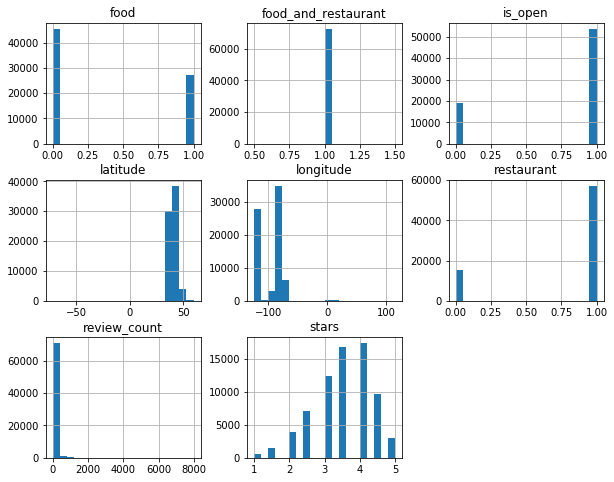

In [241]:
import matplotlib.pyplot as plt
food_restaurant_business_df.hist(bins=20, figsize=(10,8))
plt.show()

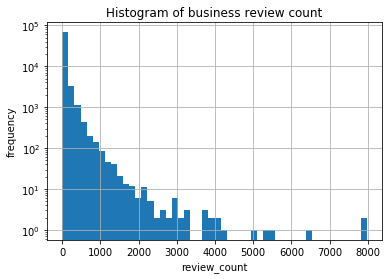

In [354]:
food_restaurant_business_df.review_count.hist(bins=50)
plt.yscale('log')
plt.title('Histogram of business review count')
plt.ylabel('frequency')
plt.xlabel('review_count')
plt.show()

It loos like these numeric columns except for reivew_count have values in normal range and do not show any suspicious values or outliers. The column 'review_count' is very interesting and has some extremely high values, but it will be more closely investigated in EDA.

Note that the earlier list created by isna() showed there is one missing value in latitude. 

In [249]:
# Missing latitude
food_restaurant_business_df[food_restaurant_business_df.latitude.isna()]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurant,food,food_and_restaurant
155342,33Ryoh0OVhopQ4zv_ITppw,7-Eleven,,2202 Paradise Rd,Las Vegas,NV,89104,NaN,-115.154606,3.0,3,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Food, Convenience Stores, Coffee & Tea]","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",0,1,1


I found this 7-eleven has latitude 36.144889 in the Google map.

In [250]:
food_restaurant_business_df.at[155342,'latitude'] = 36.144889

In [251]:
food_restaurant_business_df.loc[155342,'latitude']

36.144889

##### String columns

Now I will take care of string type columns for missing values.

In [252]:
# find string columns
str_columns =[]
for col in food_restaurant_business_df.columns:
    if isinstance(food_restaurant_business_df[col][0],str):
        str_columns.append(col)
        
print("\n string columns:", str_columns)


 string columns: ['business_id', 'name', 'neighborhood', 'address', 'city', 'state', 'postal_code']


In [258]:
# count empty strings
for col in str_columns:
    print(col, sum([1 for x in food_restaurant_business_df[col] if (x=='')]))

business_id 0
name 0
neighborhood 42071
address 789
city 3
state 0
postal_code 223


Wow, there are many missing values! 'neighborhood' column has too many missing values, so I will drop the column. 'address' and 'postal_code' will not be used in my analysis, so I will also drop the columns. Now let's check which city values are missing.

In [259]:
# Missing cities
food_restaurant_business_df[food_restaurant_business_df.city =='']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurant,food,food_and_restaurant
41372,c5zlRPjGoJsvZtIpKDIs8Q,Boojum,,5 Quay Lane,,G,,53.270268,-9.053923,4.5,11,1,"{'Ambience': '{'romantic': False, 'intimate': ...","[Mexican, Restaurants]",None,1,0,1
111036,uM-zXJpjD9SIB2dnRP1Hsg,Char-Grill,,1800 John Brantley Blvd,,NC,27623,35.873847,-78.790256,2.5,21,1,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","[Burgers, American (Traditional), Restaurants]","{'Monday': '5:0-20:0', 'Tuesday': '5:0-20:0', ...",1,0,1
125792,6hQFxiTVleaEwheMrad76A,Corrib Tea Room,,"No 3 Waterside, Woodquay",,G,,53.276381,-9.054807,5.0,5,1,"{'BikeParking': 'False', 'BusinessParking': '{...","[Coffee & Tea, Food, Guest Houses, Hotels & Tr...",None,0,1,1


In [260]:
food_restaurant_business_df.at[41372,'city'] = 'Galway'
food_restaurant_business_df.loc[41372,'city']

'Galway'

In [261]:
food_restaurant_business_df.at[111036,'city'] = 'Morrisville'
food_restaurant_business_df.loc[111036,'city']

'Morrisville'

In [262]:
food_restaurant_business_df.at[125792,'city'] = 'Galway'
food_restaurant_business_df.loc[125792,'city']

'Galway'

In [263]:
food_restaurant_business_df.loc[[41372,111036,125792],'city']

41372          Galway
111036    Morrisville
125792         Galway
Name: city, dtype: object

There is no more missing value left in string columns

##### List columns

In [295]:
sum(food_restaurant_business_df.categories.isna())

0

In [297]:
# count empty list
sum([1 for x in food_restaurant_business_df.categories if x==[]])

0

In [299]:
food_restaurant_business_df.categories.apply(lambda x: len(x)).value_counts()

2     22800
3     13628
4     13106
5      9170
6      5853
7      3549
8      1889
9      1104
10      527
1       366
11      283
12      163
13       83
14       47
15       30
16       10
17        6
18        4
22        2
24        1
19        1
20        1
37        1
Name: categories, dtype: int64

There are some lists with 1 value inside. If they are not missing values, they have to be the top categories, 'Food' or 'Restaurants'. I will check it.

In [308]:
sum(food_restaurant_business_df.categories.apply(lambda x: (x[0]=='Food')|(x[0]=='Restaurants') if len(x)==1 else True))

72624

There are no missing values in categories!!

##### Dictionary columns

The only columns with missing values left are 'attributes' and 'hours' which have dictionaries. I will not use hours in my analysis, so now the 'attributes' column is only needed to be investigated.

In [264]:
# Missing values in 'attributes' column
food_restaurant_business_df.attributes.isna().sum()

1953

Let's look into the column more closely.

In [265]:
# check the attribute keys in the first row
food_restaurant_business_df.attributes.apply(lambda x: set(x.keys()) if x else None)[0]

{'BikeParking',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'GoodForKids',
 'HasTV',
 'NoiseLevel',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTakeOut'}

In [266]:
# Make a set of business attributes 
business_attributes =set()

for attributes in business_df.attributes:
    if attributes:
        business_attributes.update(set(attributes.keys()))

In [267]:
print(business_attributes)

{'DogsAllowed', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsDelivery', 'GoodForMeal', 'RestaurantsAttire', 'RestaurantsGoodForGroups', 'HairSpecializesIn', 'BusinessAcceptsCreditCards', 'BusinessAcceptsBitcoin', 'BYOB', 'BYOBCorkage', 'Alcohol', 'AgesAllowed', 'DietaryRestrictions', 'Caters', 'Ambience', 'BikeParking', 'ByAppointmentOnly', 'WiFi', 'AcceptsInsurance', 'Smoking', 'BestNights', 'CoatCheck', 'Corkage', 'HappyHour', 'GoodForKids', 'OutdoorSeating', 'WheelchairAccessible', 'Music', 'HasTV', 'Open24Hours', 'RestaurantsTakeOut', 'RestaurantsCounterService', 'NoiseLevel', 'RestaurantsTableService', 'BusinessParking', 'GoodForDancing', 'DriveThru'}


In [268]:
len(business_attributes)

39

The 'attributes' column has dictionaries and each row can have different dictionary keys. The above number shows the number of possible business attributes. These can be useful information for a restaurant recommender. Thus, I will make each attribute into a column in the dataframe.

In [269]:
food_restaurant_business_df = pd.concat([food_restaurant_business_df, 
                                        food_restaurant_business_df['attributes'].apply(pd.Series)], 
                                        axis=1)

In [270]:
food_restaurant_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72624 entries, 0 to 188590
Data columns (total 57 columns):
business_id                   72624 non-null object
name                          72624 non-null object
neighborhood                  72624 non-null object
address                       72624 non-null object
city                          72624 non-null object
state                         72624 non-null object
postal_code                   72624 non-null object
latitude                      72624 non-null float64
longitude                     72624 non-null float64
stars                         72624 non-null float64
review_count                  72624 non-null int64
is_open                       72624 non-null int64
attributes                    70671 non-null object
categories                    72624 non-null object
hours                         54491 non-null object
restaurant                    72624 non-null int64
food                          72624 non-null int64
food_an

Now 39 business attributes are added, so the number of columns is now 57. There are many missing values in the newly created attribute columns.

In [271]:
# count missing values
#food_restaurant_business_df.isna().sum()

In [272]:
def columns_with_NAs(df, threshold):
    '''
    Return columns with missing value rates more than threshold
    print those columns with missing value rates
    '''
    na_percents = df.isna().sum()/len(df)
    columns_many_NAs = na_percents[na_percents > threshold]
    print(columns_many_NAs)
    return list(columns_many_NAs.keys())

In [273]:
columns_80percent_NAs = columns_with_NAs(food_restaurant_business_df, .2)

hours                        0.249683
AcceptsInsurance             0.998444
AgesAllowed                  0.998981
Alcohol                      0.383427
Ambience                     0.384212
BYOB                         0.987470
BYOBCorkage                  0.980599
BestNights                   0.936688
BikeParking                  0.318173
BusinessAcceptsBitcoin       0.946450
ByAppointmentOnly            0.979745
Caters                       0.448901
CoatCheck                    0.919930
Corkage                      0.990953
DietaryRestrictions          0.998100
DogsAllowed                  0.883468
DriveThru                    0.907000
GoodForDancing               0.912632
GoodForKids                  0.309292
GoodForMeal                  0.346442
HairSpecializesIn            0.999890
HappyHour                    0.911861
HasTV                        0.385382
Music                        0.918126
NoiseLevel                   0.433603
Open24Hours                  0.996131
OutdoorSeati

In [274]:
len(columns_80percent_NAs)

36

The above are the columns with over 20% missing values. Except for 'hours' (the first one), they are all columns derived from the 'attributes' column of the original dataframe. I will remove these columns.

In [275]:
food_restaurant_business_df = food_restaurant_business_df.drop(columns = columns_80percent_NAs)

Finally, I will also drop 'attributes', 'neighborhood', 'address', and 'postal_code' columns.

In [276]:
columns_to_drop = ['attributes', 'neighborhood', 'address','postal_code']

In [277]:
food_restaurant_business_df = food_restaurant_business_df.drop(columns = columns_to_drop)

In [278]:
food_restaurant_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72624 entries, 0 to 188590
Data columns (total 17 columns):
business_id                   72624 non-null object
name                          72624 non-null object
city                          72624 non-null object
state                         72624 non-null object
latitude                      72624 non-null float64
longitude                     72624 non-null float64
stars                         72624 non-null float64
review_count                  72624 non-null int64
is_open                       72624 non-null int64
categories                    72624 non-null object
restaurant                    72624 non-null int64
food                          72624 non-null int64
food_and_restaurant           72624 non-null int64
BusinessAcceptsCreditCards    61979 non-null object
BusinessParking               60412 non-null object
RestaurantsPriceRange2        65295 non-null object
RestaurantsTakeOut            61176 non-null object
dtypes: 

In [279]:
food_restaurant_business_df.columns[-4:]

Index(['BusinessAcceptsCreditCards', 'BusinessParking',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut'],
      dtype='object')

Only 17 columns are left and the last 4 are the columns from 'attributes' and they are object types. I will check the 4 columns more carefully to see what types of values they are. Note that there are missing values in these columns.

In [280]:
food_restaurant_business_df.iloc[0]

business_id                                              Apn5Q_b6Nz61Tq4XzPdf9A
name                                                       Minhas Micro Brewery
city                                                                    Calgary
state                                                                        AB
latitude                                                                51.0918
longitude                                                              -114.032
stars                                                                         4
review_count                                                                 24
is_open                                                                       1
categories                    [Tours, Breweries, Pizza, Restaurants, Food, H...
restaurant                                                                    1
food                                                                          1
food_and_restaurant                     

_BusinessAcceptsCreditCards_

In [281]:
food_restaurant_business_df.BusinessAcceptsCreditCards.value_counts()

True     59304
False     2675
Name: BusinessAcceptsCreditCards, dtype: int64

In [282]:
food_restaurant_business_df.BusinessAcceptsCreditCards[0]

'True'

This is a string, not a boolean. Thus, multiplying by 1 cannot transform True and False into 1 and 0. Thus, I will use replace() function instead.

In [283]:
food_restaurant_business_df['BusinessAcceptsCreditCards'] = food_restaurant_business_df.BusinessAcceptsCreditCards.replace({'True':1, 'False':0})

In [285]:
food_restaurant_business_df.BusinessAcceptsCreditCards.value_counts()

1.0    59304
0.0     2675
Name: BusinessAcceptsCreditCards, dtype: int64

In [287]:
# Number of missing values
sum(food_restaurant_business_df.BusinessAcceptsCreditCards.isna())

10645

In [312]:
59304+2675+10645

72624

In [319]:
# mean and median
food_restaurant_business_df.BusinessAcceptsCreditCards.mean(), food_restaurant_business_df.BusinessAcceptsCreditCards.median()

(0.9568402200745414, 1.0)

The mean and median values are very different. 

_RestaurantsTakeOut_

In [320]:
food_restaurant_business_df.RestaurantsTakeOut.value_counts()

True     55811
False     5365
Name: RestaurantsTakeOut, dtype: int64

In [321]:
food_restaurant_business_df.RestaurantsTakeOut[0]

'True'

Same as BusinessAcceptsCreditCards!! I will do the same thing.

In [322]:
food_restaurant_business_df['RestaurantsTakeOut'] = food_restaurant_business_df.RestaurantsTakeOut.replace({'True':1, 'False':0})

In [323]:
food_restaurant_business_df.RestaurantsTakeOut.value_counts()

1.0    55811
0.0     5365
Name: RestaurantsTakeOut, dtype: int64

In [324]:
# Number of missing values
sum(food_restaurant_business_df.RestaurantsTakeOut.isna())

11448

In [325]:
55811+5365+11448

72624

In [337]:
# mean and median
food_restaurant_business_df.RestaurantsTakeOut.mean(), food_restaurant_business_df.RestaurantsTakeOut.median()

(0.9123022100170002, 1.0)

_RestaurantsPriceRange2_

In [326]:
food_restaurant_business_df.RestaurantsPriceRange2.value_counts()

2    34521
1    26379
3     3756
4      639
Name: RestaurantsPriceRange2, dtype: int64

In [327]:
food_restaurant_business_df.RestaurantsPriceRange2[0]

'2'

Again, the values 1 to 4 in 'RestaurantsPriceRange2' are strings. I will make them integers.

In [75]:
# food_restaurant_business_df.RestaurantsPriceRange2.astype(int)

The above command line threw 'ValueError: cannot convert float NaN to integer'.

In [76]:
#food_restaurant_business_df.RestaurantsPriceRange2.apply(lambda x: int(x) if x else None)

This also does not work.

In [328]:
food_restaurant_business_df.RestaurantsPriceRange2.loc[10]

nan

In [329]:
type(food_restaurant_business_df.RestaurantsPriceRange2.loc[10])

float

In [330]:
food_restaurant_business_df.RestaurantsPriceRange2.loc[10] is None #why lambda x: int(x) if x else None didn't work

False

I found the missing values are not regular None value, but float NaN values (Reference: https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none )

In [331]:
food_restaurant_business_df['RestaurantsPriceRange2'] = pd.to_numeric(food_restaurant_business_df.RestaurantsPriceRange2, errors='coerce')

In [332]:
food_restaurant_business_df['RestaurantsPriceRange2'][0]

2.0

In [333]:
food_restaurant_business_df['RestaurantsPriceRange2'][10]

nan

In [334]:
sum(food_restaurant_business_df['RestaurantsPriceRange2'].isna())

7329

In [336]:
# mean and median
food_restaurant_business_df.RestaurantsPriceRange2.mean(), food_restaurant_business_df.RestaurantsPriceRange2.median()

(1.6730990121755112, 2.0)

Now the strings were changed to numeric values, but the missing values are still missing with float NaN type (not None). This will be taken care of later.

_BusinessParking_

In [91]:
type(food_restaurant_business_df.BusinessParking[0])

str

In [92]:
import ast

In [104]:
#food_restaurant_business_df['BusinessParking'] = food_restaurant_business_df.BusinessParking.apply(lambda x: ast.literal_eval(x) if x else None)

The above command again threw an error 'ValueError: malformed node or string: nan' due to float NaNs.

In [100]:
isinstance(food_restaurant_business_df.BusinessParking[10], str)

False

In [101]:
food_restaurant_business_df.BusinessParking[:10].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else None)

0     {'garage': False, 'street': True, 'validated':...
1     {'garage': False, 'street': True, 'validated':...
2     {'garage': False, 'street': False, 'validated'...
5     {'garage': False, 'street': False, 'validated'...
6     {'garage': False, 'street': False, 'validated'...
7     {'garage': False, 'street': False, 'validated'...
8     {'garage': False, 'street': False, 'validated'...
10                                                 None
11    {'garage': False, 'street': True, 'validated':...
12    {'garage': False, 'street': False, 'validated'...
Name: BusinessParking, dtype: object

In [106]:
food_restaurant_business_df['BusinessParking'] = food_restaurant_business_df.BusinessParking.apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else None)

In [112]:
type(food_restaurant_business_df.BusinessParking[0])

dict

In [116]:
food_restaurant_business_df.BusinessParking[0].keys()

dict_keys(['garage', 'street', 'validated', 'lot', 'valet'])

In [115]:
print(food_restaurant_business_df.BusinessParking[10])

None


In [313]:
# Number of missing values
sum(food_restaurant_business_df.BusinessParking.isna())

12212

In [471]:
12212/len(food_restaurant_business_df)

0.1681537783652787

These missing dictionary values can be filled with medians after being transforemd to a separate column for each key, but I am not sure how much these columns will be useful in my model. I will remove this 'BusinessParking' attribute. Finally, the 4 columns were tranformed to the right type of values and now I will fill the missing values with median.

In [314]:
food_restaurant_business_df = food_restaurant_business_df.drop(columns = 'BusinessParking')

In [315]:
# Count missing values
food_restaurant_business_df.isna().sum()

business_id                       0
name                              0
city                              0
state                             0
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
categories                        0
restaurant                        0
food                              0
food_and_restaurant               0
BusinessAcceptsCreditCards    10645
RestaurantsPriceRange2         7329
RestaurantsTakeOut            11448
dtype: int64

In [340]:
columns_to_fill = list(food_restaurant_business_df.columns[-3:])
columns_to_fill

['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'RestaurantsTakeOut']

In [341]:
for col in columns_to_fill:
    median =food_restaurant_business_df[col].median()
    food_restaurant_business_df[col]=food_restaurant_business_df[col].fillna(median)

In [342]:
# Count missing values
food_restaurant_business_df.isna().sum()

business_id                   0
name                          0
city                          0
state                         0
latitude                      0
longitude                     0
stars                         0
review_count                  0
is_open                       0
categories                    0
restaurant                    0
food                          0
food_and_restaurant           0
BusinessAcceptsCreditCards    0
RestaurantsPriceRange2        0
RestaurantsTakeOut            0
dtype: int64

They are all filled!

#### categories

The 'categories' column was used to select food and restaurant businesses. There was 1305 different categories altogather before selecting only food and restaurants. Let's see how much they were reduced.

In [141]:
# Make a set of business categories
food_restaurant_categories =set()

for categories in food_restaurant_business_df['categories']:
    if categories:
        food_restaurant_categories.update(set(categories))

In [142]:
len(food_restaurant_categories)

809

There are still too many categories to make a column for each category. Now I will used the categories_df made from a json file above to find how many second top categories there are; those categories have 'food' and 'restaurants' as parents.

In [143]:
categories_df.parents[0]

['localservices']

The column 'parents' have a list value and the right below line did not work.

In [412]:
# categories_df[(categories_df.parents ==['food'])|(categories_df.parents ==['restaurants'])]
# This gives an error

In [144]:
categories_df[(categories_df.parents.apply(lambda x: x[0]=='food' if x else False))][:10]

,alias,country_blacklist,country_whitelist,parents,title
3,acaibowls,"[CL, PL, IT, AR, MX, TR]",NaN,[food],Acai Bowls
105,backshop,NaN,"[AT, CH, DE]",[food],Backshop
108,bagels,"[AU, ES]",NaN,[food],Bagels
111,bakeries,NaN,NaN,[food],Bakeries
136,beer_and_wine,NaN,NaN,[food],"Beer, Wine & Spirits"
146,bento,NaN,[JP],[food],Bento
150,beverage_stores,NaN,"[AU, CL, ES, IT, DE, PT, AT, NL, CH, US, BE, TR]",[food],Beverage Store
195,breweries,NaN,NaN,[food],Breweries
201,bubbletea,"[ES, AT, CH, AR, MX, TR]",NaN,[food],Bubble Tea
217,butcher,"[CH, AT, DE]",NaN,[food],Butcher


In [145]:
categories_df[(categories_df.parents.apply(lambda x: x[0]=='food' if x else False))].alias.nunique()

66

In [146]:
categories_df[(categories_df.parents.apply(lambda x: x[0]=='restaurants' if x else False))][:20]

,alias,country_blacklist,country_whitelist,parents,title
18,afghani,"[MX, TR]",NaN,[restaurants],Afghan
19,african,[TR],NaN,[restaurants],African
39,andalusian,NaN,"[IT, ES]",[restaurants],Andalusian
53,arabian,[DK],NaN,[restaurants],Arabian
59,argentine,[FI],NaN,[restaurants],Argentine
60,armenian,NaN,"[ES, PL, IT, AR, CZ, US, FR, BE, GB, TR]",[restaurants],Armenian
72,asianfusion,NaN,NaN,[restaurants],Asian Fusion
75,asturian,NaN,[ES],[restaurants],Asturian
82,australian,NaN,NaN,[restaurants],Australian
83,austrian,"[DK, ES]",NaN,[restaurants],Austrian


In [147]:
categories_df[(categories_df.parents.apply(lambda x: x[0]=='restaurants' if x else False))].alias.nunique()

190

In [148]:
subcategories = (categories_df[(categories_df.parents.apply(lambda x: x[0]=='restaurants' if x else False))|
             (categories_df.parents.apply(lambda x: x[0]=='food' if x else False))]).title.tolist()

In [149]:
len(subcategories)

256

In [153]:
print(subcategories[:50])

['Acai Bowls', 'Afghan', 'African', 'Andalusian', 'Arabian', 'Argentine', 'Armenian', 'Asian Fusion', 'Asturian', 'Australian', 'Austrian', 'Backshop', 'Bagels', 'Baguettes', 'Bakeries', 'Bangladeshi', 'Basque', 'Bavarian', 'Barbeque', 'Beer, Wine & Spirits', 'Beer Garden', 'Beer Hall', 'Beisl', 'Belgian', 'Bento', 'Beverage Store', 'Bistros', 'Black Sea', 'Brasseries', 'Brazilian', 'Breakfast & Brunch', 'Breweries', 'British', 'Bubble Tea', 'Buffets', 'Bulgarian', 'Burgers', 'Burmese', 'Butcher', 'Cafes', 'Cafeteria', 'Cajun/Creole', 'Patisserie/Cake Shop', 'Cambodian', 'Canteen', 'Caribbean', 'Catalan', 'Cheesesteaks', 'Chicken Wings', 'Chicken Shop']


In [434]:
food_restaurant_business_df[food_restaurant_business_df.categories.apply(lambda x:len(x)==1)][:5]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,restaurant,food,food_and_restaurant,BusinessAcceptsCreditCards,BusinessParking,RestaurantsPriceRange2,RestaurantsTakeOut
1040,seEEDbHdTWaFViq5cDpIdg,Cafe Depot Bombardier,Saint-Laurent,2505 Des Nations Rue,Saint-Laurent,QC,H4R 3C8,45.513224,-73.711708,3.0,4,1,[Food],0,1,1,NaN,"{'garage': False, 'street': False, 'validated'...",2,True
1592,lYlVsbhDrglWDdhh7OTM2w,Rendezvous Cafe,,2341 N Rainbow Blvd,Las Vegas,NV,89108,36.202973,-115.242443,4.5,7,0,[Restaurants],1,0,1,True,"{'garage': False, 'street': False, 'validated'...",1,True
2403,5Q4Gw1pyZnG8IlFNozxIlw,Native New Yorker Restaurant,,,Gilbert,AZ,85233,33.351930,-111.821087,3.0,20,1,[Restaurants],1,0,1,True,NaN,2,True
2495,uZA-odma2Uje_kQ8ETl42A,Ruby's Diner,,3111 W Chandler Blvd Ste 2146,Chandler,AZ,85226,33.301665,-111.898018,4.5,3,0,[Restaurants],1,0,1,True,"{'garage': False, 'street': False, 'validated'...",1,NaN
2857,KdGkP141oR20eclgA_VFwg,Nothing But Noodles,,2160 E Baseline Rd,Phoenix,AZ,85073,33.377932,-112.032903,2.0,6,0,[Restaurants],1,0,1,NaN,NaN,2,NaN


Thus, there are 256 subcategories which are right below the top two categories, 'food' and 'restaurants'. The subcategories for 'food' and those for 'restaurants' do not overlap. Some 'categories' have values only the top category values. Now let's count how many of thses 256 subcateogires are actually in my dataframe.

In [154]:
subcategories_in_df = [category for category in subcategories if category in food_restaurant_categories]

In [156]:
len(subcategories_in_df)

192

In [162]:
print("Subcategories right below the top categories (food and restaurants) existing in the dataframe:\n")
print(subcategories_in_df)

Subcategories right below the top categories (food and restaurants) existing in the dataframe:

['Acai Bowls', 'Afghan', 'African', 'Arabian', 'Argentine', 'Armenian', 'Asian Fusion', 'Australian', 'Austrian', 'Backshop', 'Bagels', 'Baguettes', 'Bakeries', 'Bangladeshi', 'Basque', 'Bavarian', 'Barbeque', 'Beer Garden', 'Beer Hall', 'Belgian', 'Beverage Store', 'Bistros', 'Brasseries', 'Brazilian', 'Breakfast & Brunch', 'Breweries', 'British', 'Bubble Tea', 'Buffets', 'Bulgarian', 'Burgers', 'Burmese', 'Butcher', 'Cafes', 'Cafeteria', 'Cajun/Creole', 'Patisserie/Cake Shop', 'Cambodian', 'Caribbean', 'Cheesesteaks', 'Chicken Wings', 'Chicken Shop', 'Chilean', 'Chinese', 'Churros', 'Cideries', 'Coffee & Tea', 'Coffee Roasteries', 'Coffee & Tea Supplies', 'Comfort Food', 'Convenience Stores', 'Creperies', 'CSA', 'Cuban', 'Cupcakes', 'Custom Cakes', 'Czech', 'Czech/Slovakian', 'Delicatessen', 'Delis', 'Desserts', 'Diners', 'Dinner Theater', 'Distilleries', 'Do-It-Yourself Food', 'Donairs', 

These seem to be still too many to make a column for each category, but this information can be useful when deciding how similar two businesses are. I will decide how to use this information later.

#### Saving cleaned dataframes

In [454]:
business_df.to_csv('business.csv')

In [474]:
food_restaurant_business_df.food_and_restaurant.sum() == len(food_restaurant_business_df)

True

We do not need food_and_restaurant column anymore since it is all 1 in food_restaurant_business_df. Thus, I will drop the column.

In [475]:
food_restaurant_business_df = food_restaurant_business_df.drop(columns = 'food_and_restaurant')

In [476]:
food_restaurant_business_df.to_csv('food_restaurant_business.csv')

<a id='Review'></a>

### 2. Review Data

In [423]:
with open('yelp_academic_dataset_review.json',encoding="utf8") as fin:
    for line in fin:
        print(json.loads(line).keys(),"\n")
        
        for key, value in json.loads(line).items():
            print(key,":  ", value)
        break # to check only one line

dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool']) 

review_id :   x7mDIiDB3jEiPGPHOmDzyw
user_id :   msQe1u7Z_XuqjGoqhB0J5g
business_id :   iCQpiavjjPzJ5_3gPD5Ebg
stars :   2
date :   2011-02-25
text :   The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say...
useful :   0
funny :   0
cool :   0


In [424]:
#review_df = pd.read_json('yelp_academic_dataset_review.json', lines=True)

Above threw memory error. I will use the csv file converted by json_to_csv_converter_updated.py in order to make df without the 'text' column. The text column can be used later if needed after removing some data not in my interest.

In [425]:
review_df = pd.read_csv('yelp_academic_dataset_review.csv', 
                        usecols=['review_id', 'user_id', 'business_id', 'stars', 'date', 'useful', 'funny', 'cool'])

In [426]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 8 columns):
useful         int64
date           object
user_id        object
review_id      object
cool           int64
funny          int64
business_id    object
stars          int64
dtypes: int64(4), object(4)
memory usage: 366.0+ MB


There are 5,996,996 reviews (almost 6 millions) originally.

In [427]:
review_df.head()

,useful,date,user_id,review_id,cool,funny,business_id,stars
0,0,b'2011-02-25',b'msQe1u7Z_XuqjGoqhB0J5g',b'x7mDIiDB3jEiPGPHOmDzyw',0,0,b'iCQpiavjjPzJ5_3gPD5Ebg',2
1,0,b'2012-11-13',b'msQe1u7Z_XuqjGoqhB0J5g',b'dDl8zu1vWPdKGihJrwQbpw',0,0,b'pomGBqfbxcqPv14c3XH-ZQ',5
2,3,b'2014-10-23',b'msQe1u7Z_XuqjGoqhB0J5g',b'LZp4UX5zK3e-c5ZGSeo3kA',1,1,b'jtQARsP6P-LbkyjbO1qNGg',1
3,2,b'2011-02-25',b'msQe1u7Z_XuqjGoqhB0J5g',b'Er4NBWCmCD4nM8_p1GRdow',0,0,b'elqbBhBfElMNSrjFqW3now',2
4,0,b'2014-09-05',b'msQe1u7Z_XuqjGoqhB0J5g',b'jsDu6QEJHbwP2Blom1PLCA',0,0,b'Ums3gaP2qM3W1XcA5r6SsQ',5


In [428]:
#for col in ['review_id', 'user_id', 'business_id', 'date']:
#    review_df[col]=review_df[col].apply(lambda x: x.decode('utf-8'))

In [429]:
#for col in ['review_id', 'user_id', 'business_id', 'date']:
#    review_df[col]=review_df[col].str.decode('utf-8') also does not work

The above codes threw an error "AttributeError: 'str' object has no attribute 'decode'". Why? (see below for the answer)

In [430]:
review_df['date'][0]

"b'2011-02-25'"

In [431]:
review_df['date'][0][2:-1]

'2011-02-25'

The error above was caused because b' ' is included inside string (not byte type), so I will just remove them using indexing (from 2 to -1)

In [432]:
for col in ['review_id', 'user_id', 'business_id', 'date']:
    review_df[col]=review_df[col].apply(lambda x: x[2:-1])

In [433]:
review_df.head()

,useful,date,user_id,review_id,cool,funny,business_id,stars
0,0,2011-02-25,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,0,0,iCQpiavjjPzJ5_3gPD5Ebg,2
1,0,2012-11-13,msQe1u7Z_XuqjGoqhB0J5g,dDl8zu1vWPdKGihJrwQbpw,0,0,pomGBqfbxcqPv14c3XH-ZQ,5
2,3,2014-10-23,msQe1u7Z_XuqjGoqhB0J5g,LZp4UX5zK3e-c5ZGSeo3kA,1,1,jtQARsP6P-LbkyjbO1qNGg,1
3,2,2011-02-25,msQe1u7Z_XuqjGoqhB0J5g,Er4NBWCmCD4nM8_p1GRdow,0,0,elqbBhBfElMNSrjFqW3now,2
4,0,2014-09-05,msQe1u7Z_XuqjGoqhB0J5g,jsDu6QEJHbwP2Blom1PLCA,0,0,Ums3gaP2qM3W1XcA5r6SsQ,5


In [434]:
# find string columns
str_columns =[]
for col in review_df.columns:
    if isinstance(review_df[col][0],str):
        str_columns.append(col)
        
print("\n string columns:", str_columns)


 string columns: ['date', 'user_id', 'review_id', 'business_id']


In [435]:
# count empty or 'None' strings
for col in str_columns:
    print(col, sum([1 for x in review_df[col] if (x=='')|(x=='None')]))

date 0
user_id 0
review_id 0
business_id 0


Non numerical columns now look great and have no missing values. Let's check numerical columns now.

In [436]:
review_df.isna().sum()

useful         0
date           0
user_id        0
review_id      0
cool           0
funny          0
business_id    0
stars          0
dtype: int64

In [437]:
review_df.describe()

,useful,cool,funny,stars
count,5.996996e+06,5.996996e+06,5.996996e+06,5.996996e+06
mean,1.368465e+00,5.816597e-01,4.911249e-01,3.736306e+00
std,3.713469e+00,2.316354e+00,2.406411e+00,1.447924e+00
min,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,2.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00
max,1.234000e+03,5.050000e+02,9.910000e+02,5.000000e+00


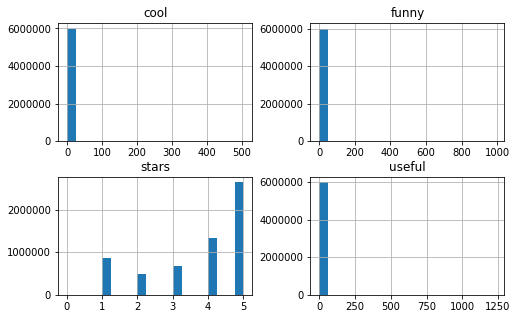

In [438]:
review_df.hist(bins=20, figsize=(8,5))
plt.show()

In [439]:
# min and max for numerical columns
for col in ['cool','funny','stars','useful']:
    print(col, "min:", review_df[col].min(), "max:", review_df[col].max())

cool min: -1 max: 505
funny min: 0 max: 991
stars min: 0 max: 5
useful min: -1 max: 1234


- The reviews cannot have negative values for 'cool' or 'useful' counts, so I guess -1 fot those columns represents missing values. 
- There is no zero star option in Yelp ratings, so I assume 0 stars represent missing values.

In [440]:
review_df[review_df.cool == -1]

,useful,date,user_id,review_id,cool,funny,business_id,stars
3445401,-1,2017-05-15,S7oukZE-NH_33uuWuR47LQ,hx5oI9l2xXwZMqyoiMXbeg,-1,0,ohEnmKpF7i2_ujme1p_vUQ,5


In [441]:
review_df[review_df.useful == -1]

,useful,date,user_id,review_id,cool,funny,business_id,stars
3445401,-1,2017-05-15,S7oukZE-NH_33uuWuR47LQ,hx5oI9l2xXwZMqyoiMXbeg,-1,0,ohEnmKpF7i2_ujme1p_vUQ,5


It is the same review that has -1 for 'cool' and 'useful' and there is only 1 case. Thus, I will remove this review.

In [442]:
review_df[review_df.stars == 0 ]

,useful,date,user_id,review_id,cool,funny,business_id,stars
4744944,0,2018-06-17,wrqh88xVEE1U5d_5TjzN4Q,QW01qOsaqlxMKoMazOw1Bg,0,0,FgNgBLayRFm6H6Qr66ecbQ,0


There is also only one review that had 0 star (which is invalid), so I will drop this review as well.

In [443]:
review_df = review_df.drop([3445401,4744944])

In [444]:
# min and max for numerical columns
for col in ['cool','funny','stars','useful']:
    print(col, "min:", review_df[col].min(), "max:", review_df[col].max())

cool min: 0 max: 505
funny min: 0 max: 991
stars min: 1 max: 5
useful min: 0 max: 1234


Now those reviews are gone!

#### Select Food and Restaurant reviews

Since my analysis will focus on food and restaurant businesses, I will make a new dataframe for food and restaurant reviews. I can obtain business ids from the dataframe 'food_restaurant_business_df' which was cleaned above.

In [445]:
food_restaurant_business_df.business_id[:5]

0    Apn5Q_b6Nz61Tq4XzPdf9A
1    AjEbIBw6ZFfln7ePHha9PA
2    O8S5hYJ1SMc8fA4QBtVujA
5    45bWSZtniwPRiqlivpS8Og
6    9A2quhZLyWk0akUetBd8hQ
Name: business_id, dtype: object

In [446]:
len(food_restaurant_business_df.business_id)

72624

In [447]:
food_restaurant_business_df.business_id.nunique()

72624

In [449]:
food_restaurant_review_df = review_df[review_df.business_id.isin(food_restaurant_business_df.business_id)]

In [450]:
len(food_restaurant_review_df)

4017884

There were 5,996,996 reviews originally and now 4,017,884 are left after selecting the reviews for food and restaurants businesses.

#### Saving cleaned dataframes

In [453]:
review_df.to_csv('review.csv')

In [451]:
food_restaurant_review_df.to_csv('food_restaurant_review.csv')

<a id='User'></a>

### 3. User Data

In [163]:
with open('yelp_academic_dataset_user.json',encoding="utf8") as fin:
    for line in fin:
        print(json.loads(line).keys(),"\n")
        
        for key, value in json.loads(line).items():
            print(key,":  ", value)
        break # to check only one line

dict_keys(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']) 

user_id :   lzlZwIpuSWXEnNS91wxjHw
name :   Susan
review_count :   1
yelping_since :   2015-09-28
friends :   None
useful :   0
funny :   0
cool :   0
fans :   0
elite :   None
average_stars :   2.0
compliment_hot :   0
compliment_more :   0
compliment_profile :   0
compliment_cute :   0
compliment_list :   0
compliment_note :   0
compliment_plain :   0
compliment_cool :   0
compliment_funny :   0
compliment_writer :   0
compliment_photos :   0


In [165]:
user_df = pd.read_json('yelp_academic_dataset_user.json', lines=True)

In [167]:
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18


In [166]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518169 entries, 0 to 1518168
Data columns (total 22 columns):
average_stars         1518169 non-null float64
compliment_cool       1518169 non-null int64
compliment_cute       1518169 non-null int64
compliment_funny      1518169 non-null int64
compliment_hot        1518169 non-null int64
compliment_list       1518169 non-null int64
compliment_more       1518169 non-null int64
compliment_note       1518169 non-null int64
compliment_photos     1518169 non-null int64
compliment_plain      1518169 non-null int64
compliment_profile    1518169 non-null int64
compliment_writer     1518169 non-null int64
cool                  1518169 non-null int64
elite                 1518169 non-null object
fans                  1518169 non-null int64
friends               1518169 non-null object
funny                 1518169 non-null int64
name                  1518169 non-null object
review_count          1518169 non-null int64
useful                15181

The above info does not show any missing values, but nonnumerical type columns ('elite','friends', 'name', 'user_id', 'yelping_since') have to be checked further.

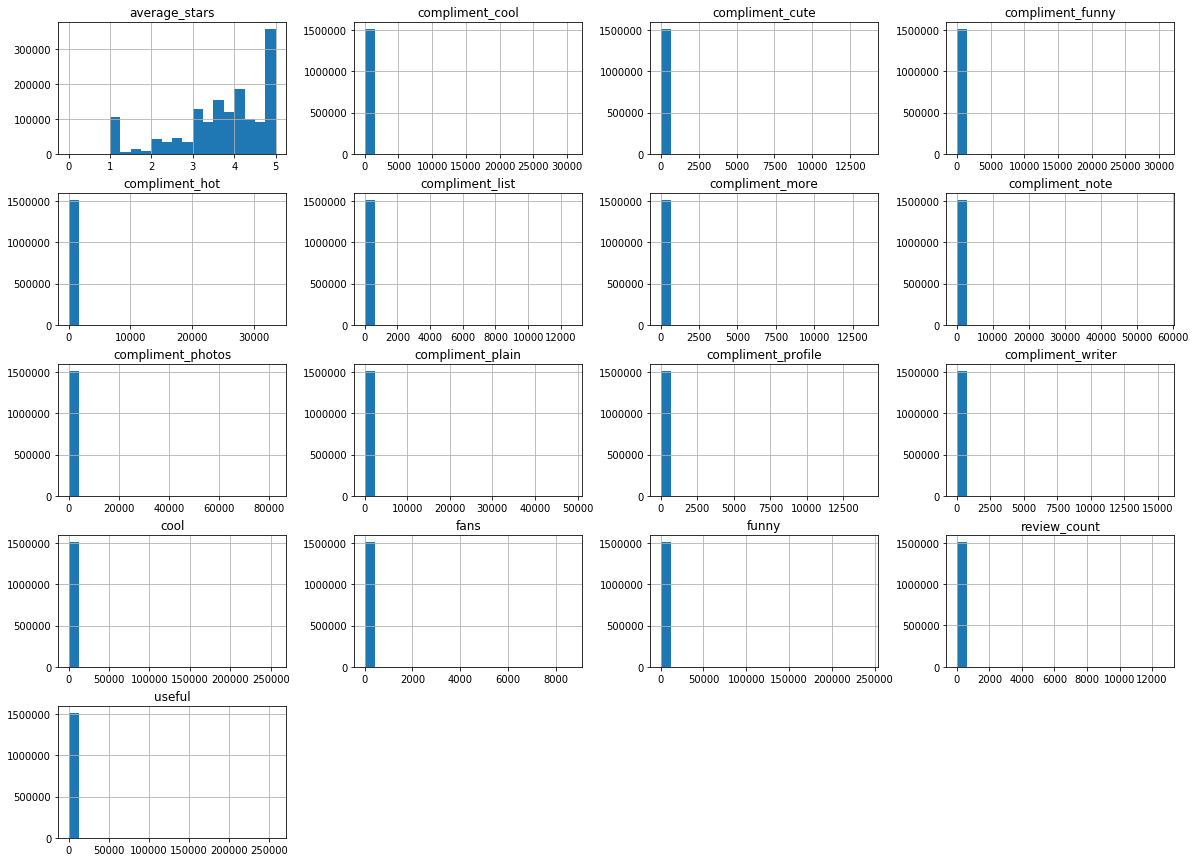

In [353]:
user_df.hist(bins=20, figsize=(20,15))
plt.yscale('log')
plt.show()

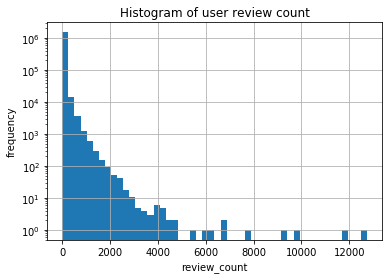

In [355]:
user_df.review_count.hist(bins=50)
plt.yscale('log')
plt.title('Histogram of user review count')
plt.ylabel('frequency')
plt.xlabel('review_count')
plt.show()

In [356]:
user_df.review_count.value_counts()[:10]

1     284651
2     192464
3     144728
4     102726
5      78109
6      62142
7      50886
8      42648
9      36907
10     32757
Name: review_count, dtype: int64

It is severely right-skewed and there are even users who left more than 10,000 reviews. I will explore these users in my EDA.
Should I filter some users with small review counts? I will also decide this later.

Now I will check nonnumerical columns.

In [466]:
# find string columns
str_columns =[]
for col in user_df.columns:
    if isinstance(user_df[col][0],str):
        str_columns.append(col)
        
print("\n string columns:", str_columns)


 string columns: ['elite', 'friends', 'name', 'user_id', 'yelping_since']


All non numerical columns are string types.

In [361]:
user_df[str_columns].head()

,elite,friends,name,user_id,yelping_since
0,None,None,Susan,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,None,None,Daipayan,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,None,None,Andy,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,None,None,Jonathan,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,None,None,Shashank,s4FoIXE_LSGviTHBe8dmcg,2017-06-18


In [363]:
# count empty strings
for col in str_columns:
    print(col, sum([1 for x in user_df[col] if (x=='')]))

elite 0
friends 0
name 473
user_id 0
yelping_since 0


In [467]:
# count 'None' strings
for col in str_columns:
    print(col, sum([1 for x in user_df[col] if (x=='None')]))

elite 1451060
friends 638278
name 18
user_id 0
yelping_since 0


In [464]:
1451060/len(user_df)

0.9557960938472594

https://www.yelp.com/dataset/documentation/main shows 
- The column 'elite' is an array of years the user was elite  
- The column 'friends' is an array of the user's friends as user_ids
- The column 'name' is the user's first name

It looks like 'elite' and 'friends' columns use 'None' to show users who were never elite users and users with no firends in Yelp, respectively. The 'name' column has both 'None' and ''(empty string), so it looks like it has some missing values. I am not likely to use these columns, but I will keep the columns just in case.

#### Select users with food and restaurant reviews

In [458]:
len(user_df)

1518169

In [457]:
food_restaurant_review_df.user_id.nunique()

1073581

In [459]:
food_restaurant_user_df = user_df[user_df.user_id.isin(food_restaurant_review_df.user_id.unique())]

In [460]:
len(food_restaurant_user_df)

1073581

#### Saving cleaned dataframes

In [422]:
user_df.to_csv('user.csv')

In [461]:
food_restaurant_user_df.to_csv('food_restaurant_user.csv')

<a id='summary'></a>

### Summary

There were 3 datasets in json format:

1. 'yelp_academic_dataset_business.json' (Business)
1. 'yelp_academic_dataset_review.json' (Review) 
1. 'yelp_academic_dataset_user.json' (User)

#### Business data
_Food and restaurant businesses_

1. Made 'categories' column with all top and subcategories in one string into a list of categories.
1. Found top categories related to places to eat are only 'food' and 'restaurants' categories.
1. Made 3 new columns with 0 and 1 indicating 
 1. whether the business belongs to 'food' category
 1. whether the business belongs to 'restaurant category
 1. whether the business belongs to 'food' or 'restaurant category
1. Selected only the food and restaurant businesses which are in my interest. There were originally 188,593 businesses, but the number was reduced to 72,624.

_Missing values_

I took care of numeric, string, list and dictionary columns separately
 1. numeric: One missing latitude was filled using its address
 1. string
   1. 3 columns, 'neighborhood', 'address', and  'postal_code' were dropped since they have many missing values and are not likely to be useful in my analysis. Location information is still in latitude and longitude columns.
   1. 3 missing city names were filled using longitude and latitude
 1. list (no missing value)
 1. dictionary
  1. ‘hours’ was removed since it has missing values over 20%.
  1. ‘attribute’ column with 39 possible business attributes as dictionary keys were made into 39 columns, but only 4 of them ('BusinessAcceptsCreditCards', 'BusinessParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut') survived after removing columns over 20% missing values. Three of the 4 were numerical columns about price range, takeout, and credit card and their missing values were filled with medians. The other column left ‘BusinessParking’ was about parking information in  dictionaries with 5 parking types as dictionary keys. The column was removed since is not likely useful in my analysis.  
 
_Outliers_

All numeric columns except for reivew_count have values in normal range and do not show any suspicious values or outliers. The column 'review_count' has some extremely high values, but it will be more closely investigated in EDA.


#### Review data
1. All four string columns 'review_id', 'user_id', 'business_id', and  'date' had an actual string value inside "b  ", but it was not byte type. (e.g.,  "b'2011-02-25'" instead of  '2011-02-25') Thus, I remove "b  ". Non numerical columns had no missing values. 
1. Numerical columns show some values in a wrong range. The reviews cannot have negative values for 'cool' or 'useful' counts, so I guessed -1 fot those columns represents missing values. There is no zero star option in Yelp ratings, so I assume 0 stars represent missing values. There were only 1 row for each missing case, so I removed the rows.
1. There were 5,996,996 reviews originally and 4,017,884 were left after selecting reviews for food and restaurants businesses.

####  User data
1. The numerical columns had  no  missing values. The distribution of review counts for users is severely right-skewed (some with over 10,000 reviews). I will explore these users in my EDA. 
1. All non numerical columns were string types. There were many empty strings for user names and ‘None’ for  'elite' and 'friends' columns. Empty strings are likely to be missing values, but  ‘None' were not. I kept the columns just in case although I am not likely to use them.


<a href = '#Top'>Return to top</a>